In [27]:
# import mesa_reader to make its classes accessible
import mesa_reader as mr

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import rgb2hex
import cutecharts.charts as ctc
from matplotlib.pyplot import xkcd

In [2]:
# make a MesaData object from a history file
h_start = mr.MesaData('./LOGS_start/history.data')
h_to_end_agb = mr.MesaData('./LOGS_to_end_agb/history.data')
h_to_wd = mr.MesaData('./LOGS_to_wd/history.data')

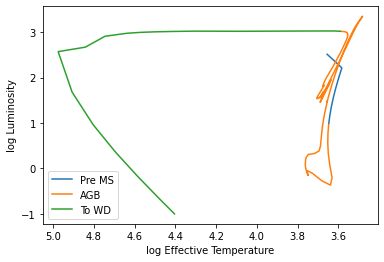

In [3]:
plt.plot(h_start.log_Teff, h_start.log_L,label="Pre MS")
plt.plot(h_to_end_agb.log_Teff, h_to_end_agb.log_L,label="AGB")
plt.plot(h_to_wd.log_Teff, h_to_wd.log_L,label="To WD")

# set axis labels
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.legend()

# invert the x-axis
plt.gca().invert_xaxis()

[1.46833224 1.46783791 1.46622312 1.46389668 1.4623374  1.46181066
 1.46140494 1.45920945 1.44626906 1.38365897 1.26746226 1.1539658
 1.03997761 0.93061612 0.81941793 0.72030945]


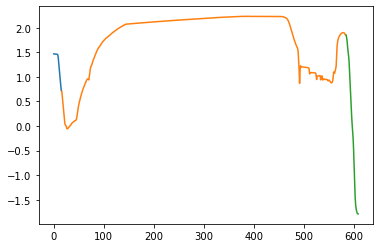

In [4]:
print(h_start.log_R)
plt.plot(h_start.log_R)
plt.plot(np.arange(len(h_start.log_R),len(h_start.log_R)+len(h_to_end_agb.log_R)),h_to_end_agb.log_R)
plt.plot(np.arange(len(h_start.log_R)+len(h_to_end_agb.log_R),len(h_start.log_R)+len(h_to_end_agb.log_R)+len(h_to_wd.log_R)),h_to_wd.log_R)

In [32]:
rayon = np.concatenate((h_start.log_R, h_to_end_agb.log_R, h_to_wd.log_R))
age = np.concatenate((h_start.star_age, h_to_end_agb.star_age, h_to_wd.star_age))
lum = np.concatenate((h_start.log_L, h_to_end_agb.log_L, h_to_wd.log_L))
temp = np.concatenate((h_start.log_Teff, h_to_end_agb.log_Teff, h_to_wd.log_Teff))
lum = np.exp(lum)
lum_norm = lum/max(lum)
rayon = np.exp(rayon)
temp = np.exp(temp)
temp_norm = temp/max(temp)

temp_essai = np.array(temp_norm*255, dtype=int)
temp_color = []

for i in range(0, len(temp_essai)-1):
    arrrr = np.array([1-temp_norm[i],0,temp_norm[i]])
    col = rgb2hex(arrrr)
    temp_color.append(col)

In [39]:
grav = np.concatenate((h_start.log_g, h_to_end_agb.log_g, h_to_wd.log_g))
grav = np.exp(grav)
grav_norm = grav/max(grav)

print(grav)

[4.48718191e+00 4.49162046e+00 4.50614996e+00 4.52716535e+00
 4.54130559e+00 4.54609236e+00 4.54978271e+00 4.56980463e+00
 4.68961850e+00 5.31520414e+00 6.70574644e+00 8.41451138e+00
 1.05690946e+01 1.31530951e+01 1.64290893e+01 2.00307871e+01
 2.05009478e+01 2.51294792e+01 3.13492272e+01 3.90876213e+01
 4.86521360e+01 6.16494490e+01 7.51054991e+01 8.08750409e+01
 8.24113290e+01 8.61854871e+01 9.40404919e+01 9.39903088e+01
 9.32070139e+01 9.12441857e+01 8.87804203e+01 8.61574036e+01
 8.42245836e+01 8.33792403e+01 8.05072447e+01 7.76640296e+01
 7.53613931e+01 7.38767113e+01 7.25696599e+01 7.13567593e+01
 7.02321382e+01 6.91986674e+01 6.82535426e+01 6.73920014e+01
 6.66029617e+01 6.55776036e+01 5.90481188e+01 5.11169520e+01
 4.41432769e+01 3.88850013e+01 3.49471165e+01 3.18995630e+01
 2.92810788e+01 2.69667117e+01 2.50925344e+01 2.31538149e+01
 2.16924696e+01 2.03517968e+01 1.91624989e+01 1.80518577e+01
 1.71408783e+01 1.63065977e+01 1.55366761e+01 1.46489347e+01
 1.39355155e+01 1.333613

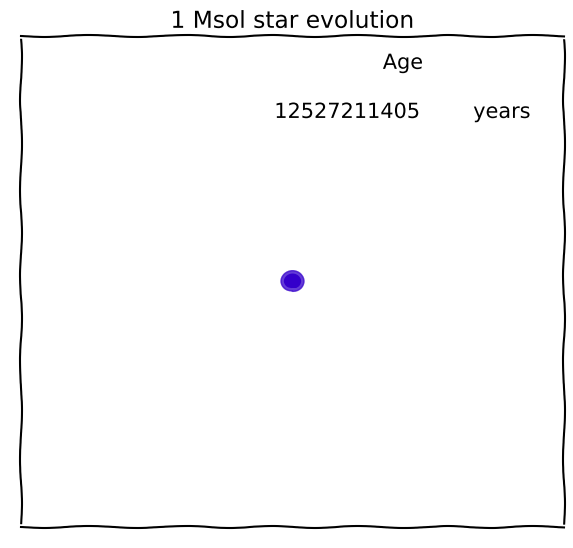

In [44]:

with plt.xkcd():  
    fig = plt.figure()
    fig.set_dpi(100)
    fig.set_size_inches(7, 6.5)
    
    ax = plt.axes(xlim=(-15, 15), ylim=(-15, 15))
    patch = plt.Circle((0, 0), rayon[0])
   # patch2 = plt.Arrow(1,0,-1,0)
    time_text2 = ax.text(5, 13, 'Age', fontsize=15)
    time_text = ax.text(-1, 10, '', fontsize=15)
    time_text3 = ax.text(10, 10, 'years', fontsize=15)
    ax.add_artist(patch)
  #  ax.add_artist(patch2)
    ax.add_artist(time_text)
    
    plt.title('1 Msol star evolution')
    
    ax2 = plt.gca()
    ax2.axes.xaxis.set_ticks([])
    ax2.axes.yaxis.set_ticks([])
    
def init():
    patch.center = (0, 0)
    ax.add_patch(patch)
  #  ax.add_patch(patch2)
    return patch, #patch2,

def animate(i):
    time_text.set_text(int(round(age[i])))
    patch.set_radius(rayon[i])
    patch.set_alpha(lum_norm[i])
    patch.set_color(temp_color[i])
   # patch2 = plt.Arrow(grav[i],0,-grav[i],0)
    return patch, time_text, #patch2,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=600, 
                               interval=1,
                               blit=True)


anim.save('basic_animat.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()